# Знакомство с `torch.Tensor`

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы: 
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/torch.html


In [63]:
import torch as th
import random
import numpy as np
import time
import matplotlib.pyplot as plt

## Задачи для совместного разбора

1\. Создайте тензор и исследуйте его основные характеристики

In [64]:
t = th.randint(10, (2, 2, 2)) 
t

tensor([[[3, 3],
         [6, 6]],

        [[4, 1],
         [1, 4]]])

In [65]:
t.shape, t.dtype, th.numel(t), t.device

(torch.Size([2, 2, 2]), torch.int64, 8, device(type='cpu'))

2\. Создайте трехмерный тензор и рассмотрите основные способы индексирования по нему

In [66]:
t = th.randint(10, (3, 3, 3)) 
t

tensor([[[1, 5, 7],
         [3, 2, 9],
         [9, 5, 8]],

        [[1, 7, 9],
         [3, 8, 6],
         [4, 4, 6]],

        [[0, 3, 0],
         [5, 1, 1],
         [0, 0, 8]]])

In [67]:
t[0, 0, 0]

tensor(1)

3\. Создайте тензор (4х4) и модифицируйте следующим образом: ко всем четным столбцам прибавьте 1, из нечетных вычтите 1.

In [68]:
t = th.randint(10, (4, 4)) 
t

tensor([[8, 6, 9, 9],
        [3, 3, 4, 5],
        [5, 8, 1, 1],
        [3, 4, 4, 9]])

In [69]:
t[::, ::2] = t[::, ::2] - 1
t[::, 1::2] = t[::, 1::2] + 1
t

tensor([[ 7,  7,  8, 10],
        [ 2,  4,  3,  6],
        [ 4,  9,  0,  2],
        [ 2,  5,  3, 10]])

4\. Обсудите совместимость `torch` с `numpy` и `sklearn`

In [70]:
th.randint(10, (2, 2, 2), device='cuda')

tensor([[[6, 3],
         [2, 4]],

        [[3, 2],
         [2, 1]]], device='cuda:0')

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Создайте двумерный тензор размера (100000, 10), заполненный нулями. Используя прихотливое индексирование, поставьте в каждой строке тензора ровно одну единицу в случайно выбранном столбце. Рассчитайте и выведите на экран вероятности $p_i$ того, что для случайно выбранной строки в столбце $i$ будет стоять единица.

- [x] Проверено на семинаре

In [71]:
t = th.zeros(100000, 10)
t

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [72]:
t[th.arange(100000), th.randint(0, 10, (100000,))] = 1
t

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])

In [73]:
t.mean(dim=0)

tensor([0.0983, 0.1008, 0.1006, 0.1004, 0.1009, 0.0995, 0.0999, 0.0995, 0.1006,
        0.0995])

<p class="task" id="2"></p>

2\. При помощи прихотливого индексирования для двумерного тензора размерности (10, 10), состоящего из случайных целых чисел в пределах от 0 до 10, получите тензор элементов, находящихся сразу над  побочной диагональю.

- [x] Проверено на семинаре

In [74]:
t = th.randint(10, (10, 10))
t

tensor([[1, 2, 8, 6, 0, 7, 1, 5, 8, 2],
        [5, 1, 3, 6, 1, 4, 2, 0, 8, 9],
        [5, 4, 7, 0, 2, 8, 8, 5, 2, 4],
        [3, 7, 1, 7, 7, 0, 0, 4, 2, 7],
        [0, 0, 2, 0, 7, 6, 8, 1, 5, 3],
        [6, 8, 8, 3, 5, 6, 9, 2, 3, 0],
        [5, 7, 5, 7, 5, 6, 3, 7, 8, 4],
        [4, 6, 3, 3, 4, 4, 4, 8, 4, 1],
        [8, 2, 5, 0, 7, 1, 7, 4, 0, 1],
        [7, 0, 1, 8, 9, 1, 7, 2, 9, 3]])

In [75]:
t[th.arange(9), th.arange(8, -1, -1)]

tensor([8, 0, 8, 0, 7, 3, 5, 6, 8])

<p class="task" id="3"></p>

3\. Создайте двумерный тензор $t$ размерности (5, 5), состоящий из случайных чисел в пределах от 0 до 100. Обнулить все значения в массиве, расположенные вне квадрата размера 3х3 вокруг максимального элемента. Если максимумов несколько, обнулите элементы около любого из них.

- [x] Проверено на семинаре

In [76]:
t = th.randint(100, (5, 5))
t

tensor([[15, 92, 44,  2, 32],
        [ 3, 25, 80, 76, 37],
        [78, 53, 90, 67, 52],
        [70, 89, 14,  4, 30],
        [51, 62, 96, 53, 77]])

In [77]:
max_index = th.where(t == t.max())[0][0], th.where(t == t.max())[1][0]
max_index

(tensor(4), tensor(2))

In [78]:
i, j = max_index
t_new = t.clone().detach()
t_new[0:max(0, i - 1), :] = 0
t_new[min(5, i + 2):, :] = 0
t_new[:, 0:max(0, j - 1)] = 0
t_new[:, min(5, j + 2):] = 0

t_new

tensor([[ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 0, 89, 14,  4,  0],
        [ 0, 62, 96, 53,  0]])

<p class="task" id="4"></p>

4\. Создайте трехмерный массив размерности (2, 5, 5) на основе решения задачи 3 (объедините исходный и результирущий тензор вдоль нулевой оси). Сохраните полученный трехмерный тензор в файл `tensor.pt`. Загрузите полученный тензор и покажите, что все элементы двух тензоров совпадают.

- [x] Проверено на семинаре

In [79]:
t_stacked = th.stack((t, t_new), dim=0)
t_stacked

tensor([[[15, 92, 44,  2, 32],
         [ 3, 25, 80, 76, 37],
         [78, 53, 90, 67, 52],
         [70, 89, 14,  4, 30],
         [51, 62, 96, 53, 77]],

        [[ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0],
         [ 0, 89, 14,  4,  0],
         [ 0, 62, 96, 53,  0]]])

In [80]:
t_stacked.shape

torch.Size([2, 5, 5])

In [81]:
th.save(t_stacked, 'saved_tensor.pt')
t_loaded = th.load('saved_tensor.pt')
t_loaded

tensor([[[15, 92, 44,  2, 32],
         [ 3, 25, 80, 76, 37],
         [78, 53, 90, 67, 52],
         [70, 89, 14,  4, 30],
         [51, 62, 96, 53, 77]],

        [[ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0],
         [ 0, 89, 14,  4,  0],
         [ 0, 62, 96, 53,  0]]])

In [82]:
th.equal(t_loaded, t_stacked)

True

<p class="task" id="5"></p>

5\. Создайте четырехмерный массив `t` размерности (2, 3, 5, 5), заполненный случайными целыми числами от 1 до 10 (сами значения должны быть представлены типом float32). Рассчитайте среднее значение для каждого двумерного тензора `t[i, j, :, :]`. Представьте результат в виде трехмерного тензора размера (2, 3, 1).

- [x] Проверено на семинаре

In [96]:
t = th.randint(10, (2, 3, 5, 5), dtype=th.float32)
t.mean(dim=(2, 3), keepdim=True)

tensor([[[[5.0800]],

         [[4.1600]],

         [[5.2800]]],


        [[[4.6800]],

         [[5.2800]],

         [[4.8400]]]])

<p class="task" id="6"></p>

6\. Создайте одномерный тензор размера `N=100_000_000`, заполненный числами из экспоненциального распредления с параметром $\lambda=5$. Рассчитайте значения для построения гистограммы при помощи пакета `torch`. Визуализируйте гистограмму. Проверьте возможность использования GPU. При наличии GPU перенесите созданный тензор в память GPU, повторите вычисления. Сравните время расчетом с и без использования GPU.

- [x] Проверено на семинаре

50.5 ms ± 1.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


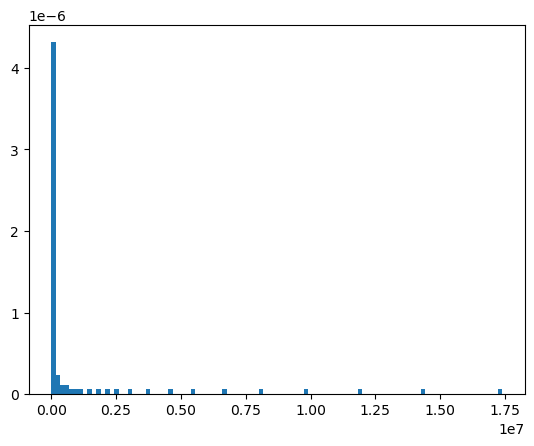

In [97]:
t = th.distributions.Exponential(0.2).sample((100_000_000,))
start_time = time.time()

hist_values, bin_edges = th.histogram(t, bins=100)
%timeit plt.hist(hist_values, bins=100, density=True)

plt.show()

In [98]:
device = th.device("cuda" if th.cuda.is_available() else "cpu")
device

device(type='cuda')

In [99]:
t = t.to(device)

%timeit hist_values = th.histc(t, bins=100)

35.4 ms ± 112 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


<p class="task" id="7"></p>

7\. Создайте четырехмерный тензор размера (10, 6, 6, 3), заполненный случайными целыми числами от 0 до 255. Считая, что данный тензор представляет собой батч из 10 картинок размера 6х6 в формате RGB, измените тензор следующим образом. Для оттенков красного обнулите все столбцы, кроме первых двух; для оттенков зеленого обнулите третий и четвертый столбцы; для оттенков синего обнулите пятый и шестой столбцы. Для выполнения задания используйте механизм распространения.

- [ ] Проверено на семинаре

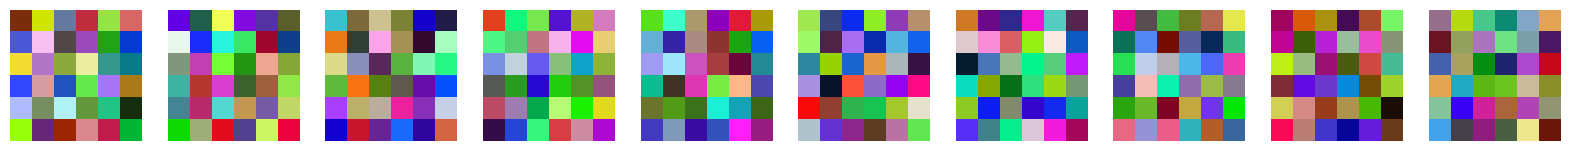

In [116]:
def plot_images(tensor_batch, batch_size=10):
    t_np = tensor_batch.numpy()
    fig, axs = plt.subplots(1, batch_size, figsize=(20, 2))
    for i in range(batch_size):
        axs[i].imshow(t_np[i].astype(np.uint8))
        axs[i].axis('off')
    plt.show()

t = th.randint(256, (10, 6, 6, 3)) 
plot_images(t)

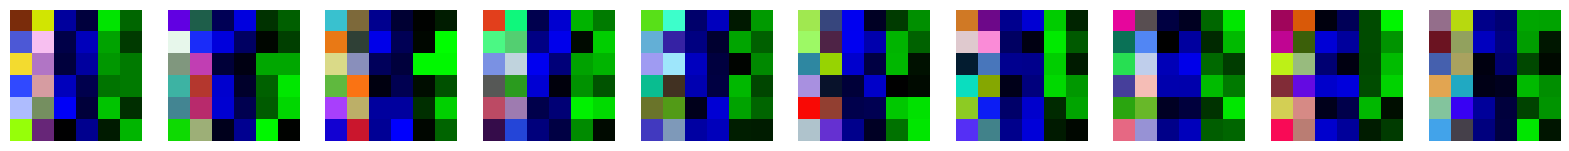

In [117]:
t[:, :, :, 0] *= th.tensor([1, 1, 0, 0, 0, 0]) 
t[:, :, :, 1] *= th.tensor([1, 1, 0, 0, 1, 1])  
t[:, :, :, 2] *= th.tensor([1, 1, 1, 1, 0, 0]) 
plot_images(t)